In [1]:
#import packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme()

In [2]:
#read in data frame
movies = pd.read_csv("imdb_top_1000.csv")
#dropping unecessary columns
movies = movies.drop(columns = ["Poster_Link"])
#making Gross product a numerical variable
movies["Gross"] = movies["Gross"].str.replace(",", "").astype(float)
#taking a look
movies.head()

,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,The Shawshank Redemption,1994,A,142 min,Drama,9.3,Two imprisoned men bond over a number of years...,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,28341469.0
1,The Godfather,1972,A,175 min,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,134966411.0
2,The Dark Knight,2008,UA,152 min,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,534858444.0
3,The Godfather: Part II,1974,A,202 min,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,57300000.0
4,12 Angry Men,1957,U,96 min,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,4360000.0


In [3]:
unique_genre = set()

def genre_finder(x):
    for g in x["Genre"].split(", "): 
        unique_genre.add(g)

movies.apply(genre_finder, axis = 1)
unique_genre

{'Action',
 'Adventure',
 'Animation',
 'Biography',
 'Comedy',
 'Crime',
 'Drama',
 'Family',
 'Fantasy',
 'Film-Noir',
 'History',
 'Horror',
 'Music',
 'Musical',
 'Mystery',
 'Romance',
 'Sci-Fi',
 'Sport',
 'Thriller',
 'War',
 'Western'}

In [4]:
#creating genre specific dataframes in dictionary d
d = {}
for genre in unique_genre: 
    d[genre] = movies[movies["Genre"].str.contains(genre)]
#checking code
print("Comedy df dimensions:  ", d["Comedy"].shape)
print("Comedy df:\n")
d["Comedy"]

Comedy df dimensions:   (233, 15)
Comedy df:



,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
19,Gisaengchung,2019,A,132 min,"Comedy, Drama, Thriller",8.6,Greed and class discrimination threaten the ne...,96.0,Bong Joon Ho,Kang-ho Song,Lee Sun-kyun,Cho Yeo-jeong,Choi Woo-sik,552778,53367844.0
26,La vita è bella,1997,U,116 min,"Comedy, Drama, Romance",8.6,When an open-minded Jewish librarian and his s...,59.0,Roberto Benigni,Roberto Benigni,Nicoletta Braschi,Giorgio Cantarini,Giustino Durano,623629,57598247.0
35,The Intouchables,2011,UA,112 min,"Biography, Comedy, Drama",8.5,After he becomes a quadriplegic from a paragli...,57.0,Olivier Nakache,Éric Toledano,François Cluzet,Omar Sy,Anne Le Ny,760360,13182281.0
47,Back to the Future,1985,U,116 min,"Adventure, Comedy, Sci-Fi",8.5,"Marty McFly, a 17-year-old high school student...",87.0,Robert Zemeckis,Michael J. Fox,Christopher Lloyd,Lea Thompson,Crispin Glover,1058081,210609762.0
51,Modern Times,1936,G,87 min,"Comedy, Drama, Family",8.5,The Tramp struggles to live in modern industri...,96.0,Charles Chaplin,Charles Chaplin,Paulette Goddard,Henry Bergman,Tiny Sandford,217881,163245.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
984,The Muppet Movie,1979,U,95 min,"Adventure, Comedy, Family",7.6,Kermit and his newfound friends trek across Am...,74.0,James Frawley,Jim Henson,Frank Oz,Jerry Nelson,Richard Hunt,32802,76657000.0
989,The Long Goodbye,1973,A,112 min,"Comedy, Crime, Drama",7.6,Private investigator Philip Marlowe helps a fr...,87.0,Robert Altman,Elliott Gould,Nina van Pallandt,Sterling Hayden,Mark Rydell,26337,959000.0
991,Kelly's Heroes,1970,GP,144 min,"Adventure, Comedy, War",7.6,A group of U.S. soldiers sneaks across enemy l...,50.0,Brian G. Hutton,Clint Eastwood,Telly Savalas,Don Rickles,Carroll O'Connor,45338,1378435.0
994,A Hard Day's Night,1964,U,87 min,"Comedy, Music, Musical",7.6,"Over two ""typical"" days in the life of The Bea...",96.0,Richard Lester,John Lennon,Paul McCartney,George Harrison,Ringo Starr,40351,13780024.0


In [5]:
import pprint
#summary statistics for each genre, by success metrics

# TO DO-> round the values so less busy?

#Meta_score
avg_metascore = {}
for genre in unique_genre:
    avg_metascore[genre] = np.mean(d[genre]["Meta_score"])
avg_metascore = sorted(avg_metascore.items(), key=lambda x:x[1], reverse=True)
print("Average metascores, by genre: \n")
pprint.pprint(avg_metascore)
print()
#Gross

avg_gross = {}
for genre in unique_genre:
    avg_gross[genre] = np.mean(d[genre]["Gross"])
avg_gross = sorted(avg_gross.items(), key=lambda x:x[1], reverse=True)
print("Average gross product, by genre: \n")
pprint.pprint(avg_gross)
print()
#IMDB_Rating
avg_IMDB = {}
for genre in unique_genre:
    avg_IMDB[genre] = np.mean(d[genre]["IMDB_Rating"])
avg_IMDB = sorted(avg_IMDB.items(), key=lambda x:x[1], reverse=True)
print("Average IMDB scores, by genre: \n")
pprint.pprint(avg_IMDB)



Average metascores, by genre: 

[('Film-Noir', 93.72727272727273),
 ('Western', 83.1),
 ('Horror', 81.55555555555556),
 ('Romance', 81.27884615384616),
 ('Animation', 81.09333333333333),
 ('War', 80.28888888888889),
 ('History', 79.22916666666667),
 ('Mystery', 78.7625),
 ('Drama', 78.04),
 ('Adventure', 78.00555555555556),
 ('Comedy', 77.95744680851064),
 ('Musical', 77.91666666666667),
 ('Family', 77.88),
 ('Thriller', 76.91525423728814),
 ('Music', 76.76315789473684),
 ('Sci-Fi', 76.59677419354838),
 ('Fantasy', 76.34482758620689),
 ('Biography', 76.31958762886597),
 ('Crime', 75.41420118343196),
 ('Action', 73.76923076923077),
 ('Sport', 72.52941176470588)]

Average gross product, by genre: 

[('Adventure', 165731278.64117646),
 ('Sci-Fi', 148026397.04918033),
 ('Action', 141239282.89102563),
 ('Animation', 127967528.46268657),
 ('Fantasy', 108616841.91071428),
 ('Family', 92932656.91666667),
 ('Comedy', 64125296.22513089),
 ('Thriller', 58676626.64545455),
 ('History', 55539532.06

In [6]:
def num_genre(x):
    return len(x["Genre"].split(", "))

movies["num_genres"] = movies.apply(num_genre, axis=1).astype('category')
movies.head()

,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross,num_genres
0,The Shawshank Redemption,1994,A,142 min,Drama,9.3,Two imprisoned men bond over a number of years...,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,28341469.0,1
1,The Godfather,1972,A,175 min,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,134966411.0,2
2,The Dark Knight,2008,UA,152 min,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,534858444.0,3
3,The Godfather: Part II,1974,A,202 min,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,57300000.0,2
4,12 Angry Men,1957,U,96 min,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,4360000.0,2


In [7]:
movies.groupby("num_genres")["num_genres"].count()

movies.groupby('num_genres').aggregate({'num_genres': 'count', 
                                        'Meta_score': 'mean', 
                                        'Gross': 'median', 
                                        'IMDB_Rating': 'mean'})

,num_genres,Meta_score,Gross,IMDB_Rating
num_genres,,,,
1,105,78.177778,7098492.0,7.967619
2,249,80.044335,20395934.0,7.978715
3,646,77.172727,29400000.0,7.934985


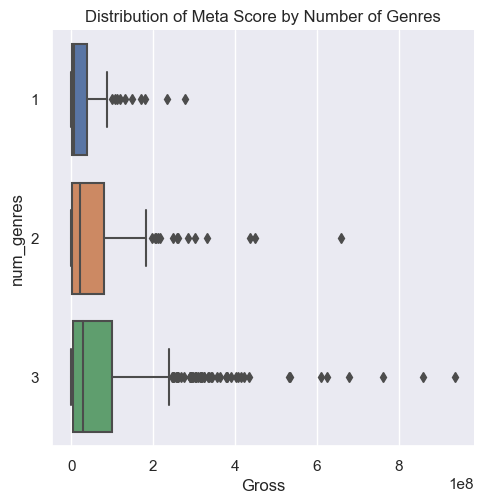

In [8]:
a = sns.catplot(data = movies, x = "Gross", y = "num_genres", kind = "box").set(title = 'Distribution of Meta Score by Number of Genres')
plt.show(a)